# Superdense Coding

This notebook demonstrates the Superdense Coding (SDC) protocol. We first use Qiskit's simulator to test our quantum circuit, and then try it out on a real quantum computer.

## Contents

1. [Superdense Coding and Quantum Teleportation](#difference)
2. [The Process](#process)    
    2.1 [Step 1](#step1)    
    2.2 [Step 2](#step2)    
    2.3 [Step 3](#step3)
3. [Simulating the Superdense Coding Protocol](#simulating)    
    3.1 [3.1 Visualizing Our Measurements](#visualising)    
4. [Superdense Coding on a Real Quantum Computer](#real_qc)


## 1. The Difference between Superdense Coding and Quantum Teleportation <a id='difference'></a>

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

Quantum teleportation is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

| Teleportation                                     | Superdense Coding                                    |
|:-------------------------------------------------:|:----------------------------------------------------:|
| Transmit one<br>qubit using two<br>classical bits | Transmit two<br>classical bits<br>using one<br>qubit |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”



## 2. The Process <a id='process'></a>




### 2.1 Step 1 <a id='step1'></a>
The process starts with a third party, who we'll call Charlie. Two qubits are prepared by Charlie in an entangled state. He initially starts the 2 qubits in the basis state $|0\rangle$. He applies Hadamard gate ($H$) to the first qubit to create superposition. He then applies CNOT gate ($CX$) using the first qubit as a control and the second as the target. This is the entangled state (Bell pair) we mentioned earlier.

#### Outcome States

We start in the state:

$$|00\rangle = |0\rangle_A\otimes |0\rangle_B$$

where the qubit to be sent to Alice is labeled with $A$ and the qubit to be sent to Bob is labeled $B$. Charlie first applies a Hadamard gate to the first qubit, which creates superposition and we get the state:


$$|+0\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$



Then Charlie applies the CNOT gate. The CNOT gate entangles both qubits, i.e. it flips the target if the control is $|1\rangle$. Note that the control qubit is our leftmost qubit.



$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$



### 2.2 Step 2 <a id='step2'></a>

Charlie sends the first qubit to Alice and the second qubit to Bob. The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit. But before she does, she needs to apply a set of quantum gates to her qubit depending on the 2 bits of information she wants to send:


#### Encoding Rules for Superdense Coding (Alice protocol):
<table>
    <tr>
        <th>Intended Message</th>
        <th>Applied Gate</th>
        <th>Resulting State ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td>$I$</td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td>$X$</td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td>$Z$</td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>$ZX$</td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

Thus if she wants to send a `00`, she does nothing to her qubit (apply the identity ($I$) gate). If she wants to send a `01`, then she applies the $X$ gate. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.


### 2.3 Step 3 <a id='step3'></a>

Bob receives Alice's qubit (leftmost qubit) and uses his qubit to decode Alice's message. Notice that he does not need to have knowledge of the state in order to decode it — he simply uses the restoration operation.

Bob applies a CNOT gate using the leftmost qubit as control and the rightmost as target. Then he applies a Hadamard gate and finally performs a measurement on both qubits to extract Alice's message.

<table>
    <tr>
        <th>Bob Receives ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After CNOT-gate ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After H-gate</th>
    </tr>
    <tr>
        <td>$|00\rangle + |11\rangle$</td>
        <td>$|00\rangle + |10\rangle$</td>
        <td>$|00\rangle$</td>
    </tr>
    <tr>
        <td>$|10\rangle + |01\rangle$</td>
        <td>$|11\rangle + |01\rangle$</td>
        <td>$|01\rangle$</td>
    </tr>
    <tr>
        <td>$|00\rangle - |11\rangle$</td>
        <td>$|00\rangle - |10\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
    <tr>
        <td>$-|10\rangle + |01\rangle$</td>
        <td>$-|11\rangle + |01\rangle$</td>
        <td>$|11\rangle$</td>
    </tr>
</table>

## 3. Simulating the Superdense Coding Protocol (2 Bit) <a id='simulating'></a>

In [5]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime numpy matplotlib pylatexenc qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 113.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [21]:
# Qiskit 2.2.3 – Correct imports

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator     # New simulator import
from qiskit.visualization import plot_histogram



We saw that to create an entangled pair, we needed to do a H-gate followed by a CNOT. Let's create a function that takes a `QuantumCircuit` and entangles the qubits with indices `a` and `b`:

In [8]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

Next we need to encode our message. We saw that there were four possible messages we could send: `00`, `10`, `01` or `11`. Let's create a function that takes this message and applies the appropriate gates for us:

In [9]:
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

Finally, we need to decode our message, we saw we could do this using a CNOT followed by a H-gate. Let's create a function that does this for us too:

In [10]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

Finally, we can put this together to complete our protocol.

In [11]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

### 3.1 Visualizing Our Measurements <a id='visualising'></a>

{'10': 1024}


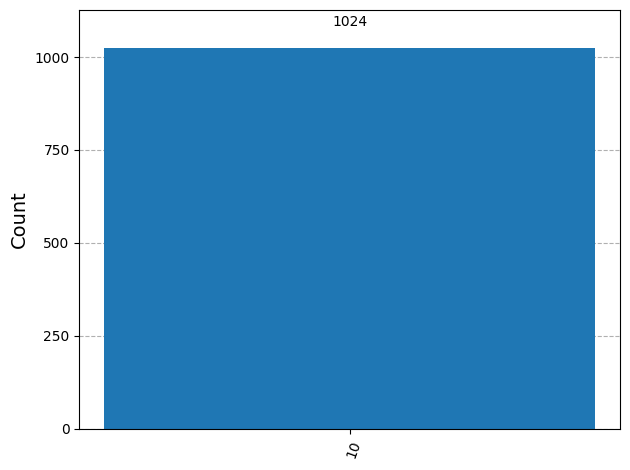

In [13]:
aer_sim = AerSimulator()
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Our simulator simulates a perfect quantum computer. We can see that, without errors, we get a 100% chance of measuring the correct message.

# **Three-Bit Superdense Coding Using a GHZ State**

In this project, we implement a **3-bit dense coding protocol** using a **3-qubit GHZ state** as the shared entangled resource.

Two senders participate:

- **Alice** encodes **2 classical bits** using Pauli operations on her qubit.
- **Charlie** encodes **1 classical bit** using a Pauli gate on his qubit.
- **Bob**, the receiver, applies an inverse GHZ operation and measures the qubits.

This demonstrates *distributed superdense coding* using multipartite entanglement, where multiple senders encode classical information simultaneously using a shared GHZ state.

We test the protocol on the **Qiskit AerSimulator** and observe that every distinct 3-bit classical message uniquely corresponds to a stabilizer basis state produced at Bob's measurement stage.

---


## **1. Theoretical Background**

### **1.1 GHZ State**
A 3-qubit GHZ state is defined as:

\[
|\mathrm{GHZ}\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}
\]

It is created using:
1. Apply Hadamard on qubit 0  
2. Apply CNOT from qubit 0 → qubit 1  
3. Apply CNOT from qubit 0 → qubit 2  

---

### **1.2 Encoding Rules**

#### **Alice’s Encoding (2 bits: \(a_1a_0\))**
| Message | Operation(s) |
|---------|--------------|
| 00 | Identity (I) |
| 01 | X |
| 10 | Z |
| 11 | ZX |

#### **Charlie’s Encoding (1 bit: \(c\))**
| Message | Operation |
|---------|-----------|
| 0 | I |
| 1 | X |

---

### **1.3 Bob’s Decoding**

Bob applies the **inverse GHZ creation**:

\[
U^\dagger_{\text{GHZ}} = \text{CX}(0,2)\;\text{CX}(0,1)\;H(0)
\]

Finally, he measures all qubits to read the encoded 3-bit message.

---

### **1.4 Goal**

We will simulate *all 8 possible messages*:

\[
a_1a_0c \in \{000,001,010,011,100,101,110,111\}
\]

and show:
- Each message results in a **unique measurement outcome**.
- The mapping learned forms a valid 3-bit dense coding protocol using GHZ entanglement.

---


## **2. Building the 3-Bit GHZ Superdense Coding Protocol**

We define helper functions to:
- Create the GHZ state  
- Encode Alice's 2-bit message  
- Encode Charlie's 1-bit message  
- Bob's decoding circuit  
- Build the full circuit for a given 3-bit message  


In [30]:
def create_ghz():
    qc = QuantumCircuit(3, 3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    return qc

def encode_message3(qc, msg):
    """
    Encode a 3-bit message string msg = a1 a0 c
      - a1 a0 : Alice's 2-bit message (encoded on qubit 1 via Z (a1) and X (a0))
      - c      : Charlie's 1-bit message (encoded on qubit 0 via X if '1')
    Example: '101' -> a_bits='10' (Z on q1), c='1' (X on q0)
    """
    if len(msg) != 3 or not set(msg).issubset({'0','1'}):
        raise ValueError("msg must be 3 chars 'a1a0c' of 0/1, e.g. '101'")

    a_bits = msg[:2]   # 'a1a0'
    c_bit  = msg[2]    # 'c'

    # Charlie encodes on qubit 0 (single bit)
    if c_bit == '1':
        qc.x(0)

    # Alice encodes on qubit 1: apply X for LSB then Z for MSB (same convention as before)
    if a_bits[1] == '1':
        qc.x(1)
    if a_bits[0] == '1':
        qc.z(1)

    return qc

def decode_message3(qc):
    """
    Extended decoder consistent with qc.cx(1,0); qc.h(1) for 2-qubit SDC.
    For 3 qubits we add CX(1,2) to disentangle the third qubit as well, then H(1).
    """
    qc.cx(1, 0)
    qc.cx(1, 2)
    qc.h(1)
    return qc


## **3. Simulating All 8 Possible 3-Bit Messages**

We now:
1. Construct the GHZ-SDC circuit for each message.  
2. Run each on Qiskit AerSimulator.  
3. Collect measurement histograms.  
4. Display all results in a grid.  


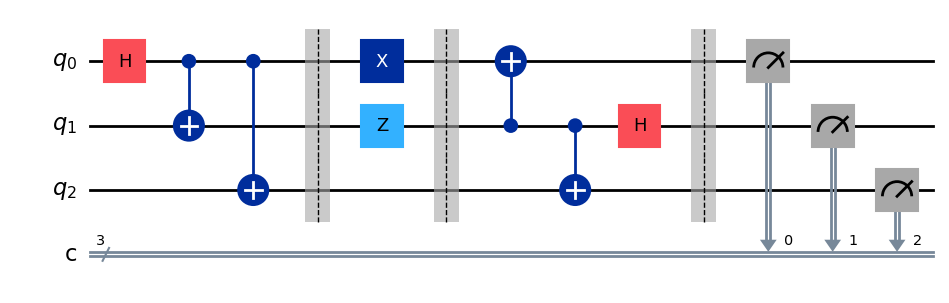

In [31]:
qc = create_ghz()

# Visual separation
qc.barrier()

# Now Alice (q1) and Charlie (q0) will encode their bits.
# Here `message` is a 3-bit string: a1 a0 c  (Alice=2bits, Charlie=1bit)
message = '101'   # example: Alice sends '10', Charlie sends '1'
qc = encode_message3(qc, message)
qc.barrier()

# Bob applies the recovery protocol (decoder)
qc = decode_message3(qc)
qc.barrier()

# Measure all qubits (we'll map q0->c0, q1->c1, q2->c2)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Draw the circuit
display(qc.draw(output='mpl'))


Counts: {'011': 2048}


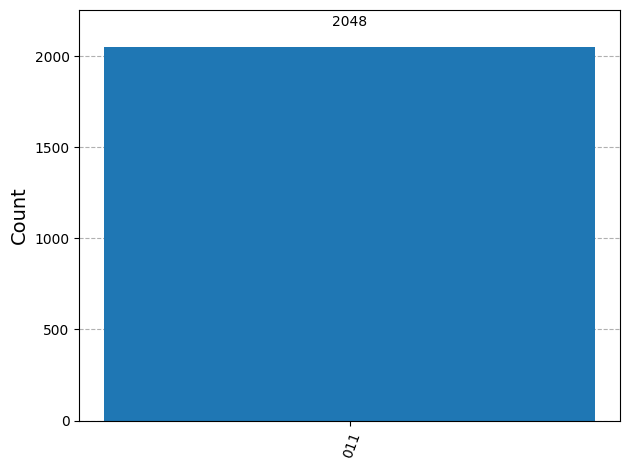

In [32]:
# Simulate and show the counts (ideal simulator)
sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=2048)
result = job.result()
counts = result.get_counts()
print("Counts:", counts)
display(plot_histogram(counts))
